dinero 100000000 win 49998618 loss 50001382 max 536870882 consecutive loss 27
25002568
Counter({1: 12504129, 2: 6248356, 3: 3125666, 4: 1561614, 5: 781714, 6: 390452, 7: 195598, 8: 96960, 9: 48841, 10: 24589, 11: 12365, 12: 6207, 13: 3096, 14: 1485, 15: 757, 16: 364, 17: 194, 18: 79, 19: 52, 20: 26, 21: 11, 23: 4, 22: 4, 25: 2, 24: 2, 27: 1})


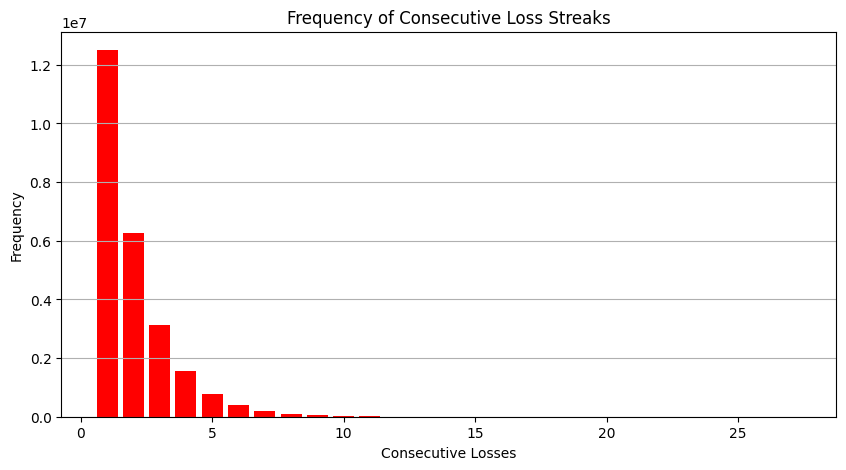

In [1]:
import random
import matplotlib.pyplot as plt
from collections import Counter

consl = 0
tempconsl = 0
i = 1
win = 0
loss = 0
apuesta = 1
max = 0
tempmax = 0
dinero = 0
all_consecutive_losses = []

while i <= 100000000:
    if random.choice([True, False]):
        win += 1
        dinero += apuesta
        tempmax = 1
        if tempconsl > 0:
            all_consecutive_losses.append(tempconsl)  # Store the loss streak
        tempconsl = 0
        # print(apuesta)
        apuesta = 1
    else:
        loss += 1
        dinero -= apuesta
        apuesta += apuesta + 1
        tempmax += apuesta
        if tempmax > max:
            max = tempmax
        tempconsl += 1
        if tempconsl > consl:
            consl = tempconsl
        # print("lost")
    i += 1
print("dinero", dinero, "win", win, "loss", loss, "max", max, "consecutive loss", consl)
#print("All consecutive loss streaks:", all_consecutive_losses)
print(len(all_consecutive_losses))

# Count occurrences of each loss streak
loss_streak_counts = Counter(all_consecutive_losses)
loss_lengths = list(loss_streak_counts.keys())
frequencies = list(loss_streak_counts.values())
print(loss_streak_counts)

# Plot the frequency of loss streaks
plt.figure(figsize=(10,5))
plt.bar(loss_lengths, frequencies, color='r')
plt.xlabel("Consecutive Losses")
plt.ylabel("Frequency")
plt.title("Frequency of Consecutive Loss Streaks")
plt.grid(axis='y')
plt.show()

In [88]:
import numpy as np

def simulate_coin_flips(trials=100000, flips=500, streak=10):
    success_count = 0

    for _ in range(trials):
        # Simulate 50 coin flips (1 = Heads, 0 = Tails)
        coin_flips = np.random.randint(0, 2, flips)

        # Check if there is a streak of 10 consecutive heads (1s)
        for i in range(flips - streak + 2):
            if np.all(coin_flips[i:i + streak] == 1):
                success_count += 1
                break  # No need to check further in this trial

    return success_count / trials

# Run simulation
probability_estimate = simulate_coin_flips()
probability_estimate


0.2159

In [60]:
coin_flips = np.random.randint(0, 2, 50)
print(coin_flips)

[0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 1]


In [67]:
def simulate_limited_streaks(trials=100000, flips=50, max_streak=3):
    success_count = 0

    for _ in range(trials):
        # Simulate 50 coin flips (1 = Heads, 0 = Tails)
        coin_flips = np.random.randint(0, 2, flips)
        
        # Check if there is any streak of heads longer than max_streak
        longest_streak = 0
        current_streak = 0

        for flip in coin_flips:
            if flip == 1:  # If heads
                current_streak += 1
                longest_streak = max(longest_streak, current_streak)
            else:  # If tails, reset streak
                current_streak = 0
        
        # Count this trial as a success if the longest streak is ≤ max_streak
        if longest_streak <= max_streak:
            success_count += 1

    return success_count / trials

# Run simulation for no more than 3 consecutive heads
probability_no_long_streaks = simulate_limited_streaks()
probability_no_long_streaks


TypeError: 'int' object is not callable

In [77]:
import numpy as np

# Simulation parameters
num_trials = 1_000  # Number of simulations
num_flips = 50000  # Number of flips per trial
streak_length = 20  # Desired streak of heads

def has_streak(trial, streak_length):
    """Check if a given trial contains at least one streak of `streak_length` heads."""
    max_streak = 0
    current_streak = 0
    for flip in trial:
        if flip == 1:  # 1 represents heads
            current_streak += 1
            if current_streak >= streak_length:
                return True  # Found a valid streak
        else:
            current_streak = 0  # Reset streak
    return False

# Run simulations
success_count = 0
for _ in range(num_trials):
    flips = np.random.randint(2, size=num_flips)  # Generate 50 random coin flips (0 = tails, 1 = heads)
    if has_streak(flips, streak_length):
        success_count += 1

# Compute probability
probability = success_count / num_trials
probability


0.029